In [21]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

**before any coding, let's explain each personality:**
<br></br>
The 16 Myers-Briggs personality types, which categorize individuals based on their preferred energy source (Extraversion (E) or Introversion (I)), information gathering style (Sensing (S) or Intuition (N)), decision-making process (Thinking (T) or Feeling (F)), and lifestyle approach (Judging (J) or Perceiving (P)). 

1. First letter (E or I): Extraversion (E) means drawing energy from interacting with others, while Introversion (I) means gaining energy from alone time.
2. Second letter (S or N): Sensing (S) indicates a preference for concrete details, while Intuition (N) means focusing on patterns and possibilities.
3. Third letter (T or F): Thinking (T) represents making decisions based on logic and analysis, while Feeling (F) involves considering emotions and values.
4. Fourth letter (J or P): Judging (J) indicates a preference for planning and structure, while Perceiving (P) means being more flexible and adaptable. 

The personality types:
1. ENFJ (Extraverted, Intuitive, Feeling, Judging): Charismatic, empathetic leaders who enjoy helping others grow. They are people-focused, intuitive about emotions, and structured in their approach.
2. ENFP (Extraverted, Intuitive, Feeling, Perceiving): Enthusiastic, creative, and imaginative individuals who value authenticity. They are curious, open to new ideas, and prefer flexibility.
3. ENTJ (Extraverted, Intuitive, Thinking, Judging): Assertive, strategic, and goal-oriented leaders who enjoy organizing people and systems. They value efficiency and logic.
4. ENTP (Extraverted, Intuitive, Thinking, Perceiving): Innovative, curious, and argumentative individuals who love exploring ideas and possibilities. They prefer flexibility and adaptability.
5. ESFJ (Extraverted, Sensing, Feeling, Judging): Friendly, practical, and conscientious individuals who value harmony and personal connections. They are organized and reliable.
6. ESFP (Extraverted, Sensing, Feeling, Perceiving): Fun-loving, spontaneous, and outgoing individuals who seek excitement and new experiences. They focus on the present moment and enjoy connecting with others.
7. ESTJ (Extraverted, Sensing, Thinking, Judging): Practical, organized, and decisive individuals who value tradition, structure, and efficiency. They prefer clear rules and authority.
8. ESTP (Extraverted, Sensing, Thinking, Perceiving): Energetic, adventurous, and action-oriented individuals who thrive in the present moment. They are practical and prefer hands-on experiences.
9. INFJ (Introverted, Intuitive, Feeling, Judging): Insightful, empathetic, and idealistic individuals who seek meaning and purpose. They value deep connections and have a strong sense of vision.
10. INFP (Introverted, Intuitive, Feeling, Perceiving): Creative, introspective, and compassionate individuals who are guided by their values. They prefer flexibility and enjoy exploring possibilities.
11. INTJ (Introverted, Intuitive, Thinking, Judging): Strategic, independent, and visionary individuals who focus on long-term goals. They value logic and efficiency and prefer structure.
12. INTP (Introverted, Intuitive, Thinking, Perceiving): Analytical, curious, and open-minded individuals who enjoy exploring abstract concepts and ideas. They prefer flexibility and independent thinking.
13. ISFJ (Introverted, Sensing, Feeling, Judging): Warm, responsible, and practical individuals who value tradition and loyalty. They focus on the details and enjoy helping others.
14. ISFP (Introverted, Sensing, Feeling, Perceiving): Gentle, creative, and spontaneous individuals who value personal freedom. They are sensitive to others' feelings and appreciate beauty and aesthetics.
15. ISTJ (Introverted, Sensing, Thinking, Judging): Detail-oriented, responsible, and dependable individuals who value structure and order. They focus on facts and practicality.
16. ISTP (Introverted, Sensing, Thinking, Perceiving): Independent, resourceful, and adventurous individuals who enjoy problem-solving and hands-on experiences. They are practical and prefer flexibility.


In [23]:
data = pd.read_excel(r"C:\Users\jasmi\INFO371\data\Combined_songs.xlsx")
data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,MBTI
0,0.487,0.716,5,-6.294,1,0.0348,0.00873,0.000203,0.1340,0.5940,104.980,audio_features,6aBh6vT0UV14DneyyNorR2,spotify:track:6aBh6vT0UV14DneyyNorR2,https://api.spotify.com/v1/tracks/6aBh6vT0UV14...,https://api.spotify.com/v1/audio-analysis/6aBh...,163448,4,ENFJ
1,0.560,0.936,3,-5.835,1,0.0439,0.00847,0.000000,0.1610,0.3710,112.960,audio_features,0GO8y8jQk1PkHzS31d699N,spotify:track:0GO8y8jQk1PkHzS31d699N,https://api.spotify.com/v1/tracks/0GO8y8jQk1Pk...,https://api.spotify.com/v1/audio-analysis/0GO8...,218013,4,ENFJ
2,0.494,0.632,5,-6.890,1,0.0342,0.68200,0.000000,0.0869,0.0797,147.873,audio_features,6Up545NUflOiXo8cEraH49,spotify:track:6Up545NUflOiXo8cEraH49,https://api.spotify.com/v1/tracks/6Up545NUflOi...,https://api.spotify.com/v1/audio-analysis/6Up5...,274693,4,ENFJ
3,0.574,0.555,6,-6.478,0,0.0357,0.24400,0.000011,0.2530,0.5720,159.192,audio_features,3mv8GeRDz9C2XjbwVCRCED,spotify:track:3mv8GeRDz9C2XjbwVCRCED,https://api.spotify.com/v1/tracks/3mv8GeRDz9C2...,https://api.spotify.com/v1/audio-analysis/3mv8...,208614,4,ENFJ
4,0.537,0.863,7,-4.460,1,0.0446,0.00201,0.000000,0.2010,0.4840,97.020,audio_features,4DZghpw50ZnO3ckfDuNkft,spotify:track:4DZghpw50ZnO3ckfDuNkft,https://api.spotify.com/v1/tracks/4DZghpw50ZnO...,https://api.spotify.com/v1/audio-analysis/4DZg...,203587,4,ENFJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142549,0.663,0.660,0,-7.802,1,0.0501,0.59600,0.001560,0.3310,0.4830,142.009,audio_features,6VZXTCIXbgypt0erc2U1Uk,spotify:track:6VZXTCIXbgypt0erc2U1Uk,https://api.spotify.com/v1/tracks/6VZXTCIXbgyp...,https://api.spotify.com/v1/audio-analysis/6VZX...,148866,4,ISTP
142550,0.676,0.747,4,-4.639,0,0.0342,0.17700,0.000000,0.2210,0.4490,106.021,audio_features,6fLKwF2FLBtPNvtrVjYDVz,spotify:track:6fLKwF2FLBtPNvtrVjYDVz,https://api.spotify.com/v1/tracks/6fLKwF2FLBtP...,https://api.spotify.com/v1/audio-analysis/6fLK...,256344,4,ISTP
142551,0.363,0.678,2,-4.939,0,0.0995,0.02990,0.000000,0.3240,0.3210,162.124,audio_features,7HMz8o0m7ASQ3ImFPfhWTY,spotify:track:7HMz8o0m7ASQ3ImFPfhWTY,https://api.spotify.com/v1/tracks/7HMz8o0m7ASQ...,https://api.spotify.com/v1/audio-analysis/7HMz...,300413,4,ISTP
142552,0.463,0.973,9,-4.069,1,0.1660,0.02300,0.080800,0.2800,0.4310,144.076,audio_features,1lKZgG6hiw9BhDeXORQpmA,spotify:track:1lKZgG6hiw9BhDeXORQpmA,https://api.spotify.com/v1/tracks/1lKZgG6hiw9B...,https://api.spotify.com/v1/audio-analysis/1lKZ...,274908,4,ISTP


In [26]:
# dropping the unnecessary columns: type, id, uri, track_href, analysis_url, duration_ms, and time_signature (they are mostly
# 4 anyways, so we dont need time_signature):
columns_to_drop = ['type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature']
data = data.drop(columns=columns_to_drop)

# verifying
print(data.columns)

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'MBTI'],
      dtype='object')


In [28]:
data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,MBTI
0,0.487,0.716,5,-6.294,1,0.0348,0.00873,0.000203,0.1340,0.5940,104.980,ENFJ
1,0.560,0.936,3,-5.835,1,0.0439,0.00847,0.000000,0.1610,0.3710,112.960,ENFJ
2,0.494,0.632,5,-6.890,1,0.0342,0.68200,0.000000,0.0869,0.0797,147.873,ENFJ
3,0.574,0.555,6,-6.478,0,0.0357,0.24400,0.000011,0.2530,0.5720,159.192,ENFJ
4,0.537,0.863,7,-4.460,1,0.0446,0.00201,0.000000,0.2010,0.4840,97.020,ENFJ
...,...,...,...,...,...,...,...,...,...,...,...,...
142549,0.663,0.660,0,-7.802,1,0.0501,0.59600,0.001560,0.3310,0.4830,142.009,ISTP
142550,0.676,0.747,4,-4.639,0,0.0342,0.17700,0.000000,0.2210,0.4490,106.021,ISTP
142551,0.363,0.678,2,-4.939,0,0.0995,0.02990,0.000000,0.3240,0.3210,162.124,ISTP
142552,0.463,0.973,9,-4.069,1,0.1660,0.02300,0.080800,0.2800,0.4310,144.076,ISTP


In [30]:
# since the MBTI column is categorical, we'll convert it into numerical representations, using techniques like one-hot encoding.
# creating new columns for each MBTI letter combination
data['E/I'] = data['MBTI'].apply(lambda x: 'E' if x[0] == 'E' else 'I')
data['S/N'] = data['MBTI'].apply(lambda x: 'S' if x[1] == 'S' else 'N')
data['T/F'] = data['MBTI'].apply(lambda x: 'T' if x[2] == 'T' else 'F')
data['J/P'] = data['MBTI'].apply(lambda x: 'J' if x[3] == 'J' else 'P')
data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,MBTI,E/I,S/N,T/F,J/P
0,0.487,0.716,5,-6.294,1,0.0348,0.00873,0.000203,0.1340,0.5940,104.980,ENFJ,E,N,F,J
1,0.560,0.936,3,-5.835,1,0.0439,0.00847,0.000000,0.1610,0.3710,112.960,ENFJ,E,N,F,J
2,0.494,0.632,5,-6.890,1,0.0342,0.68200,0.000000,0.0869,0.0797,147.873,ENFJ,E,N,F,J
3,0.574,0.555,6,-6.478,0,0.0357,0.24400,0.000011,0.2530,0.5720,159.192,ENFJ,E,N,F,J
4,0.537,0.863,7,-4.460,1,0.0446,0.00201,0.000000,0.2010,0.4840,97.020,ENFJ,E,N,F,J
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142549,0.663,0.660,0,-7.802,1,0.0501,0.59600,0.001560,0.3310,0.4830,142.009,ISTP,I,S,T,P
142550,0.676,0.747,4,-4.639,0,0.0342,0.17700,0.000000,0.2210,0.4490,106.021,ISTP,I,S,T,P
142551,0.363,0.678,2,-4.939,0,0.0995,0.02990,0.000000,0.3240,0.3210,162.124,ISTP,I,S,T,P
142552,0.463,0.973,9,-4.069,1,0.1660,0.02300,0.080800,0.2800,0.4310,144.076,ISTP,I,S,T,P


In [32]:
# converting the categorical columns to numeric values in order to use with k means clustering
mbti_mapping = {
    'E': 1, 'I': 0,  # E/I
    'S': 1, 'N': 0,  # S/N
    'T': 1, 'F': 0,  # T/F
    'J': 1, 'P': 0   # J/P
}

data['E/I'] = data['E/I'].map(mbti_mapping)
data['S/N'] = data['S/N'].map(mbti_mapping)
data['T/F'] = data['T/F'].map(mbti_mapping)
data['J/P'] = data['J/P'].map(mbti_mapping)
data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,MBTI,E/I,S/N,T/F,J/P
0,0.487,0.716,5,-6.294,1,0.0348,0.00873,0.000203,0.1340,0.5940,104.980,ENFJ,1,0,0,1
1,0.560,0.936,3,-5.835,1,0.0439,0.00847,0.000000,0.1610,0.3710,112.960,ENFJ,1,0,0,1
2,0.494,0.632,5,-6.890,1,0.0342,0.68200,0.000000,0.0869,0.0797,147.873,ENFJ,1,0,0,1
3,0.574,0.555,6,-6.478,0,0.0357,0.24400,0.000011,0.2530,0.5720,159.192,ENFJ,1,0,0,1
4,0.537,0.863,7,-4.460,1,0.0446,0.00201,0.000000,0.2010,0.4840,97.020,ENFJ,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142549,0.663,0.660,0,-7.802,1,0.0501,0.59600,0.001560,0.3310,0.4830,142.009,ISTP,0,1,1,0
142550,0.676,0.747,4,-4.639,0,0.0342,0.17700,0.000000,0.2210,0.4490,106.021,ISTP,0,1,1,0
142551,0.363,0.678,2,-4.939,0,0.0995,0.02990,0.000000,0.3240,0.3210,162.124,ISTP,0,1,1,0
142552,0.463,0.973,9,-4.069,1,0.1660,0.02300,0.080800,0.2800,0.4310,144.076,ISTP,0,1,1,0


In [42]:
# creating X: 
# selecting relevant features for clustering (all but MBTI)
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 
            'instrumentalness', 'liveness', 'valence', 'tempo', 'E/I', 'S/N', 'T/F', 'J/P']

X = data[features]
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,E/I,S/N,T/F,J/P
0,0.487,0.716,5,-6.294,1,0.0348,0.00873,0.000203,0.1340,0.5940,104.980,1,0,0,1
1,0.560,0.936,3,-5.835,1,0.0439,0.00847,0.000000,0.1610,0.3710,112.960,1,0,0,1
2,0.494,0.632,5,-6.890,1,0.0342,0.68200,0.000000,0.0869,0.0797,147.873,1,0,0,1
3,0.574,0.555,6,-6.478,0,0.0357,0.24400,0.000011,0.2530,0.5720,159.192,1,0,0,1
4,0.537,0.863,7,-4.460,1,0.0446,0.00201,0.000000,0.2010,0.4840,97.020,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142549,0.663,0.660,0,-7.802,1,0.0501,0.59600,0.001560,0.3310,0.4830,142.009,0,1,1,0
142550,0.676,0.747,4,-4.639,0,0.0342,0.17700,0.000000,0.2210,0.4490,106.021,0,1,1,0
142551,0.363,0.678,2,-4.939,0,0.0995,0.02990,0.000000,0.3240,0.3210,162.124,0,1,1,0
142552,0.463,0.973,9,-4.069,1,0.1660,0.02300,0.080800,0.2800,0.4310,144.076,0,1,1,0


In [44]:
# scaling the features. scaling ensures that each feature has an equal opportunity to influence the clustering process and helps K-means 
# produce more meaningful and interpretable results.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

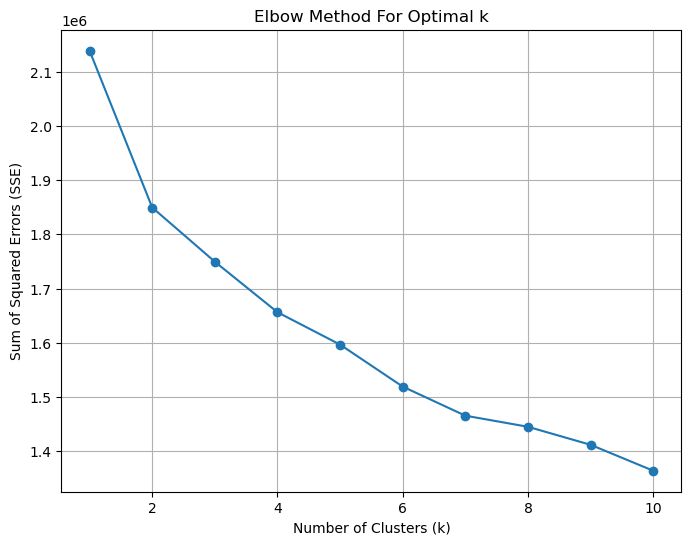

In [46]:
# elbow Method to find the optimal number of clusters (k)
# also plot the sum of squared distances for different k values

sse = []  # list to store sum of squared errors for different k values
k_range = range(1, 11)  # trying k from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)  # inertia is the sum of squared distances

# elbow graph
plt.figure(figsize=(8, 6))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid(True)
plt.show()

In [51]:
# optimal k
optimal_k = 2

# fitting
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
kmeans.fit(X_scaled)

KMeans(n_clusters=2, random_state=0)

In [53]:
# adding the cluster labels to the data frame
data['cluster'] = kmeans.labels_
data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,MBTI,E/I,S/N,T/F,J/P,cluster
0,0.487,0.716,5,-6.294,1,0.0348,0.00873,0.000203,0.1340,0.5940,104.980,ENFJ,1,0,0,1,0
1,0.560,0.936,3,-5.835,1,0.0439,0.00847,0.000000,0.1610,0.3710,112.960,ENFJ,1,0,0,1,0
2,0.494,0.632,5,-6.890,1,0.0342,0.68200,0.000000,0.0869,0.0797,147.873,ENFJ,1,0,0,1,1
3,0.574,0.555,6,-6.478,0,0.0357,0.24400,0.000011,0.2530,0.5720,159.192,ENFJ,1,0,0,1,0
4,0.537,0.863,7,-4.460,1,0.0446,0.00201,0.000000,0.2010,0.4840,97.020,ENFJ,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142549,0.663,0.660,0,-7.802,1,0.0501,0.59600,0.001560,0.3310,0.4830,142.009,ISTP,0,1,1,0,0
142550,0.676,0.747,4,-4.639,0,0.0342,0.17700,0.000000,0.2210,0.4490,106.021,ISTP,0,1,1,0,0
142551,0.363,0.678,2,-4.939,0,0.0995,0.02990,0.000000,0.3240,0.3210,162.124,ISTP,0,1,1,0,0
142552,0.463,0.973,9,-4.069,1,0.1660,0.02300,0.080800,0.2800,0.4310,144.076,ISTP,0,1,1,0,0


Text(0, 0.5, 'Count')

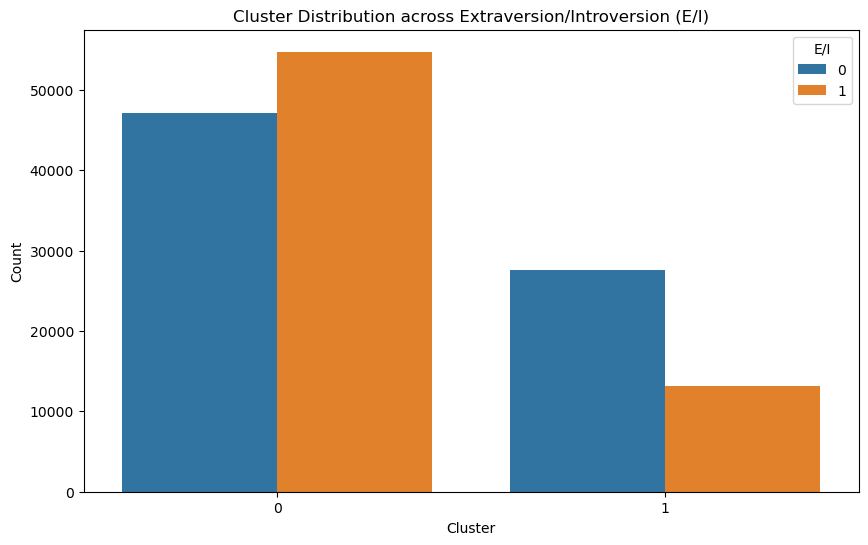

In [55]:
# plot for the distribution of clusters across Extraversion/Introversion (E/I)
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster', hue='E/I', data=data)
plt.title('Cluster Distribution across Extraversion/Introversion (E/I)')
plt.xlabel('Cluster')
plt.ylabel('Count')

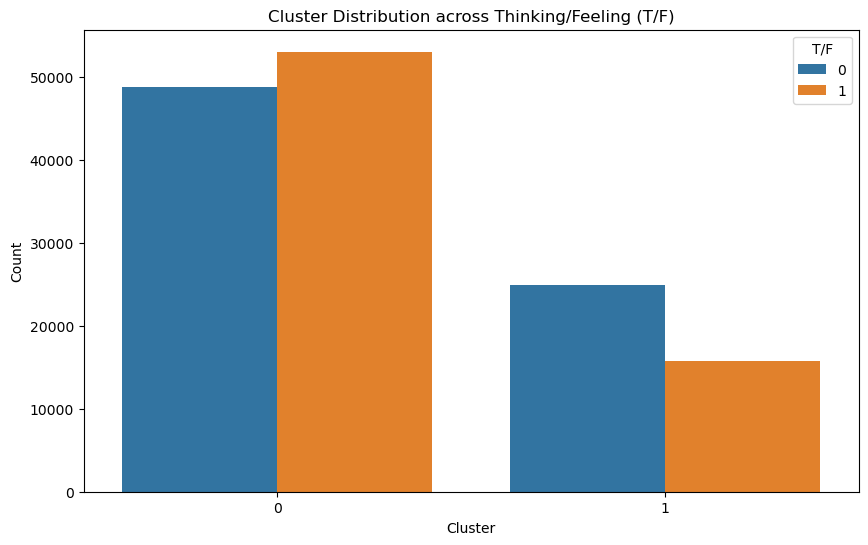

In [56]:
# plot for the distribution of clusters across Thinking/Feeling (T/F)
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster', hue='T/F', data=data)
plt.title('Cluster Distribution across Thinking/Feeling (T/F)')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

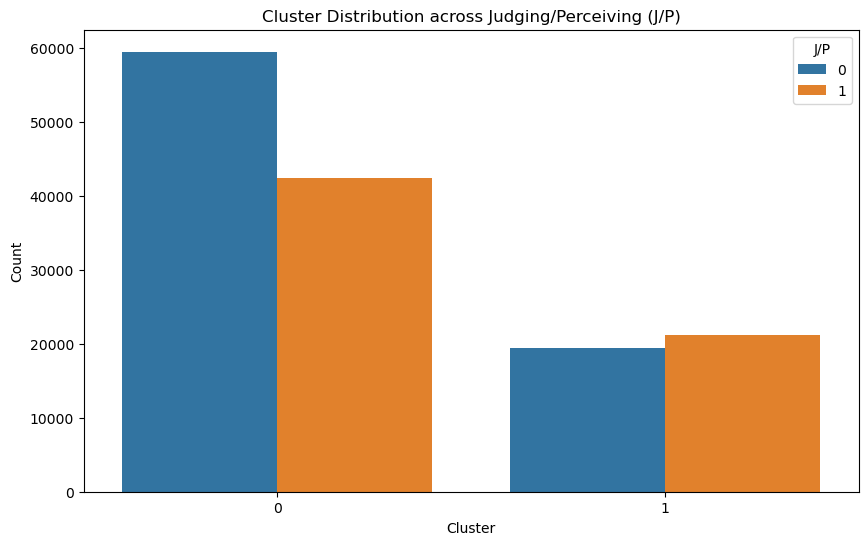

In [59]:
# plot for the distribution of clusters across Judging/Perceiving (J/P)
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster', hue='J/P', data=data)
plt.title('Cluster Distribution across Judging/Perceiving (J/P)')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

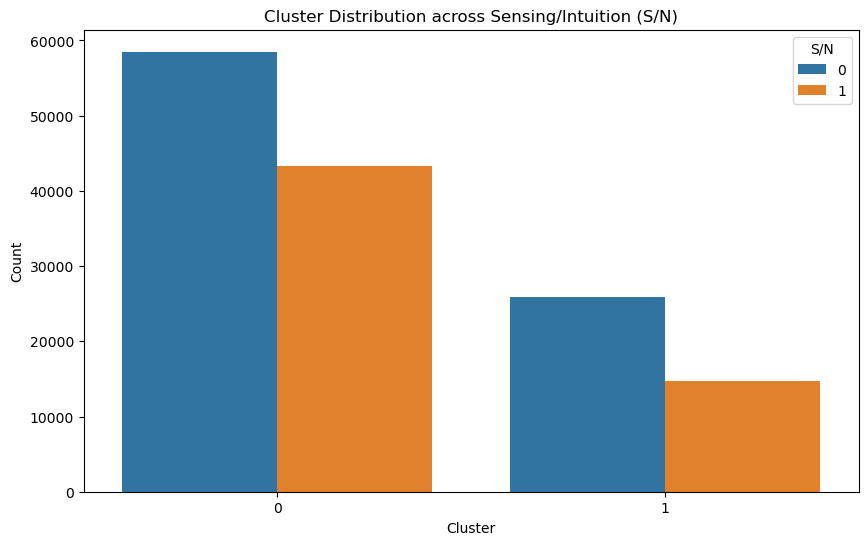

In [60]:
# plot for the distribution of clusters across Sensing/Intuition (S/N)
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster', hue='S/N', data=data)
plt.title('Cluster Distribution across Sensing/Intuition (S/N)')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

In [63]:
# analyzing the cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)  # inverse transform the cluster centers to the original scale
cluster_centers_df = pd.DataFrame(cluster_centers, columns=features)  # create a dataframe with the updated features list
print('cluster centers:')
cluster_centers_df

cluster centers:


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,E/I,S/N,T/F,J/P
0,0.628331,0.727855,5.366428,-5.893946,0.574323,0.094392,0.136663,0.048689,0.195699,0.542108,124.737474,0.537412,0.425834,0.521178,0.415731
1,0.513800,0.366938,5.057359,-11.365520,0.704775,0.055013,0.621355,0.185541,0.149103,0.296555,114.053580,0.323463,0.363001,0.386582,0.521865


- **cluster 1 (0)**: has high energy, high danceability, and low loudness, which can reflect energetic pop or dance music. the moderate valence indicates that this cluster may have happy or upbeat tracks. the higher values for E/I and T/F suggest that individuals in this cluster are more extraverted and emotionally driven in their music preferences.
- **cluster 2 (1)**: has high valence and low energy, which can reflect calm, relaxing music or classical tunes. the higher acousticness and lower energy, loudness, and tempo suggest that this cluster represents more mellow, acoustic, or laid-back music. the lower valence reflects a more somber or relaxed mood. the lower E/I value suggests that individuals in this cluster might prefer introspective, calm music that aligns with introverted and emotionally sensitive traits.

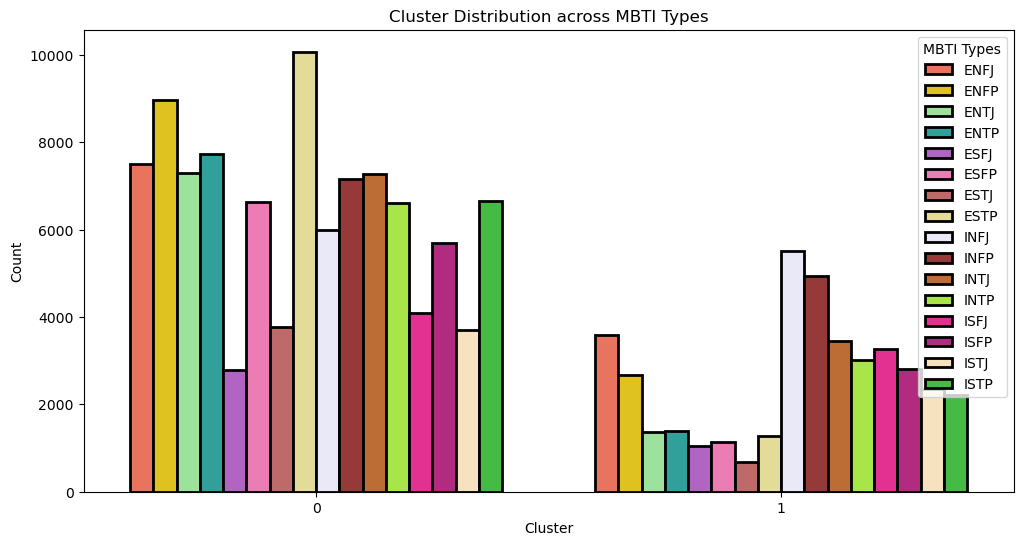

In [65]:
# analyzing the MBTI types in each cluster:
# doing so by checking how many individuals from each MBTI type fall into each cluster. 
# this will show if certain clusters align with specific personality traits.
mbti_cluster_counts = data.groupby(['cluster', 'MBTI']).size().unstack(fill_value=0)
mbti_cluster_counts

# color palatte to give a distinct color for each MBTI type
palette = ['#FF6347', '#FFD700', '#90EE90', '#20B2AA', '#BA55D3', '#FF69B4', '#CD5C5C', '#F0E68C', 
           '#E6E6FA', '#A52A2A', '#D2691E', '#ADFF2F', '#FF1493', '#C71585', '#FFE4B5', '#32CD32']

# visualizing the cluster distributions across MBTI types
plt.figure(figsize=(12, 6))
sns.countplot(x='cluster', hue='MBTI', data=data, linewidth=2, edgecolor='black', palette=palette)
plt.title('Cluster Distribution across MBTI Types')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='MBTI Types', loc='upper right')
plt.show()

**The bar graph shows the distribution of individuals from each MBTI type across the clusters:**
- The bar graph shows the count of individuals of each MBTI type in each cluster, letting us directly associate personality types with clusters.
- This plot visualizes the distribution of MBTI types across the different clusters created by the music features (energy, danceability, etc.).

**Interpretation of MBTI types:**
<br></br>
Cluster 1 (0) Dominant MBTI Types:
Likely features a higher proportion of introverted types (I), such as INFJ, ISFP, ISTJ, and logical types (T) like INTP, ISTP.
This suggests that Cluster 0 aligns with music preferences characterized by lower energy, higher acousticness, or more reflective qualities.
These traits match introspective or structured personalities, who may enjoy calm, complex, or emotional tracks.

**cluster 1 (energetic, extraverted, positive mood):**

- ENFJ, ENFP, ENTJ, ENTP: these types dominate cluster 1, with ENFJ and ENFP being represented much more. these individuals tend to be energetic, outgoing, and people-oriented, which aligns with the characteristics of cluster 1 (high energy, upbeat, positive mood).
- ESFJ, ESFP, ESTJ, ESTP: these types are also well-represented in this cluster, confirming that cluster 1 corresponds to individuals who are more sociable and likely to enjoy energetic, danceable music.
- while introverts like INFJ, INFP, and INTJ are present, their numbers are much lower in cluster 1. introverted individuals prefer calmer music and might be more likely to fall into cluster 2.

**cluster 2 (relaxing, introverted, calmer mood):**
- the introverted types INFJ, INFP, and INTJ are more heavily represented in this cluster, which aligns with the calmer, more acoustic-focused music characterized by this cluster.
- ISFJ, ISFP, and ISTJ are also represented in this cluster, indicating that more reflective, introspective types gravitate toward music with a lower energy, more acoustic, and emotional quality.
- extraverts still appear in cluster 2, but in much smaller numbers compared to cluster 1. ESFJ, ESFP, and ESTJ have a moderate presence, but it's clear that they are less likely to fall into this cluster, which suggests they prefer higher-energy music.

**summary:**
- Extraverts (E): extraverted individuals, particularly ENFJ, ENFP, ENTJ, and ENTP, are more likely to enjoy energetic, danceable, and upbeat music. These types are significantly more present in cluster 1, which has higher energy, danceability, and tempo. This suggests that Extraverts might gravitate toward music that is high-energy and social, supporting their need for stimulation and excitement.
- Introverts (I): introverted individuals, especially INFJ, INFP, and INTJ, are more likely to enjoy calmer, more introspective, or acoustic-based music. These types are overrepresented in cluster 2, which has lower energy, more acoustic characteristics, and slower tempos. This suggests that Introverts tend to prefer music that is less loud and more reflective, aligning with their typically more introspective and reserved nature.
- Feeling Types (F): feeling types like ENFJ, ESFJ, INFP, and INFJ are common in both clusters. ENFJ and ESFJ (both feeling types, and extraverted) are more prevalent in cluster 1 (higher energy, more outgoing music), and INFP and INFJ (feeling types, introverted) are more prevalent in cluster 0 (calmer, less energetic music). feeling types might be drawn to music that resonates with their emotions, whether it's energetic or calming.
- Judging vs. Perceiving (J/P): there's a somewhat even distribution of Judging and Perceiving types across both clusters, but Perceiving types (like ENFP, INFP, ISFP, ESTP) are generally more common in cluster 2, which aligns with their preference for flexibility and variety. Judging types (like ESTJ, ISTJ, ESFJ) are more in cluster 1, showing that they have a preference for more structured and stable music that fits their organized lifestyle.

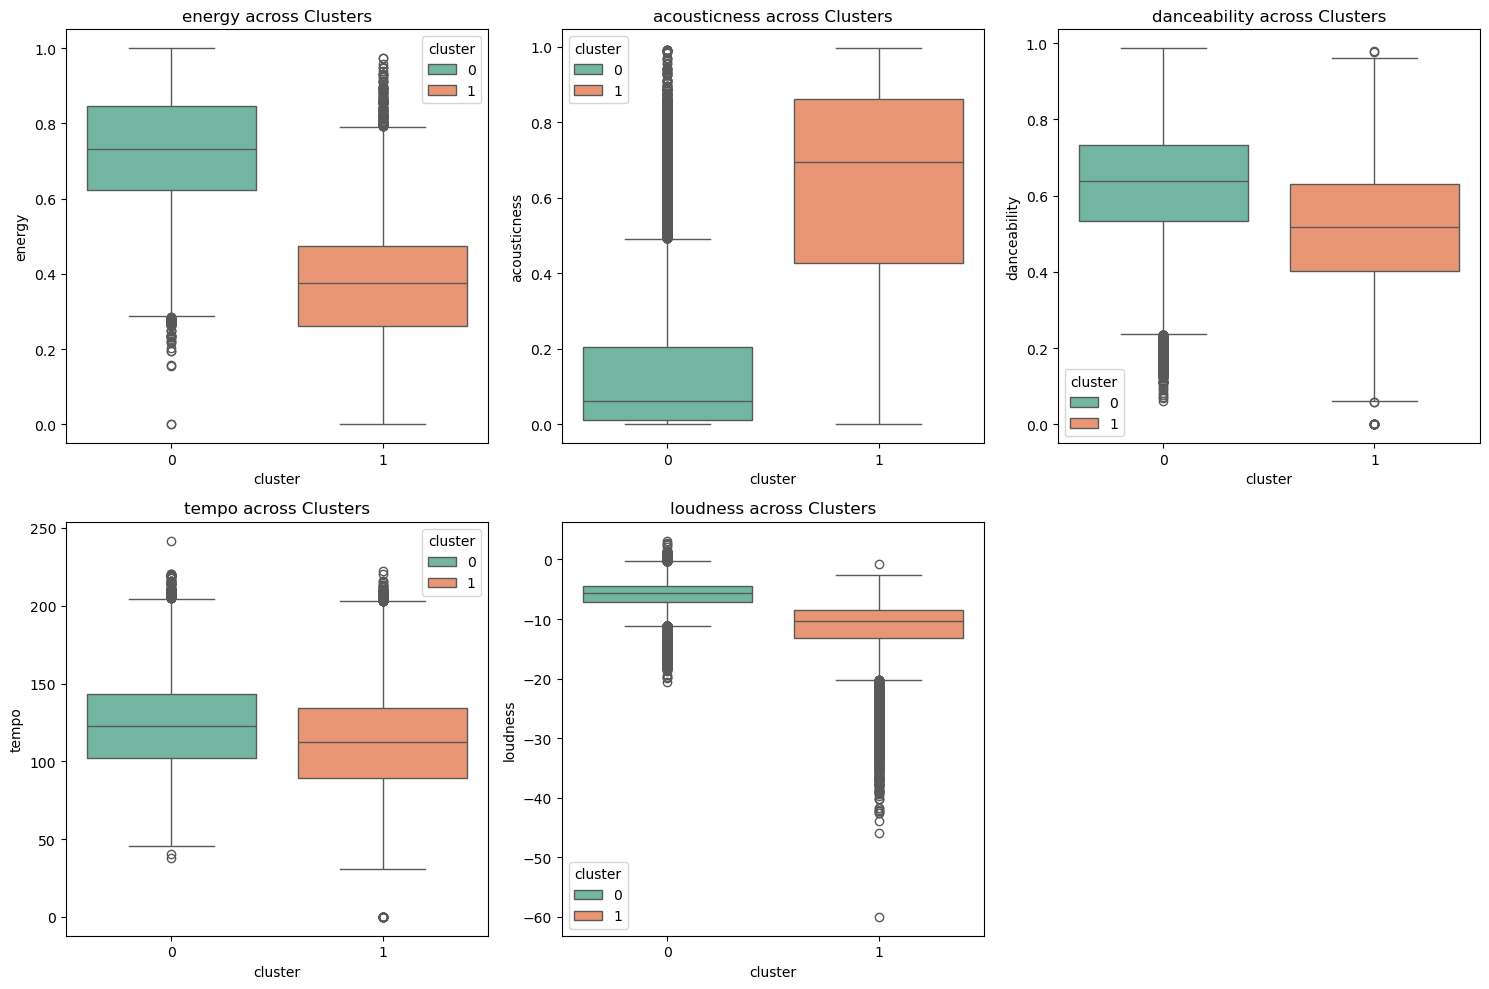

In [67]:
# plotting feature distributions to better understand how each cluster differs across these features:
# List of features to plot:
# i chose these specific features to plot because they seem to have the most relevance and impact on music preferences
features_to_plot = ['energy', 'acousticness', 'danceability', 'tempo', 'loudness']

# subplots for each feature
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features_to_plot):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='cluster', y=feature, data=data, hue='cluster', palette='Set2')
    plt.title(f'{feature} across Clusters')

plt.tight_layout()
plt.show()

- These plots visualize the distribution of a music feature (like energy) across clusters.
- The boxplot shows the spread of values for a specific feature (like energy) in each cluster.
- By visualizing the spread of music features across different clusters, we can see if certain clusters are linked to high or low values of specific music features. 

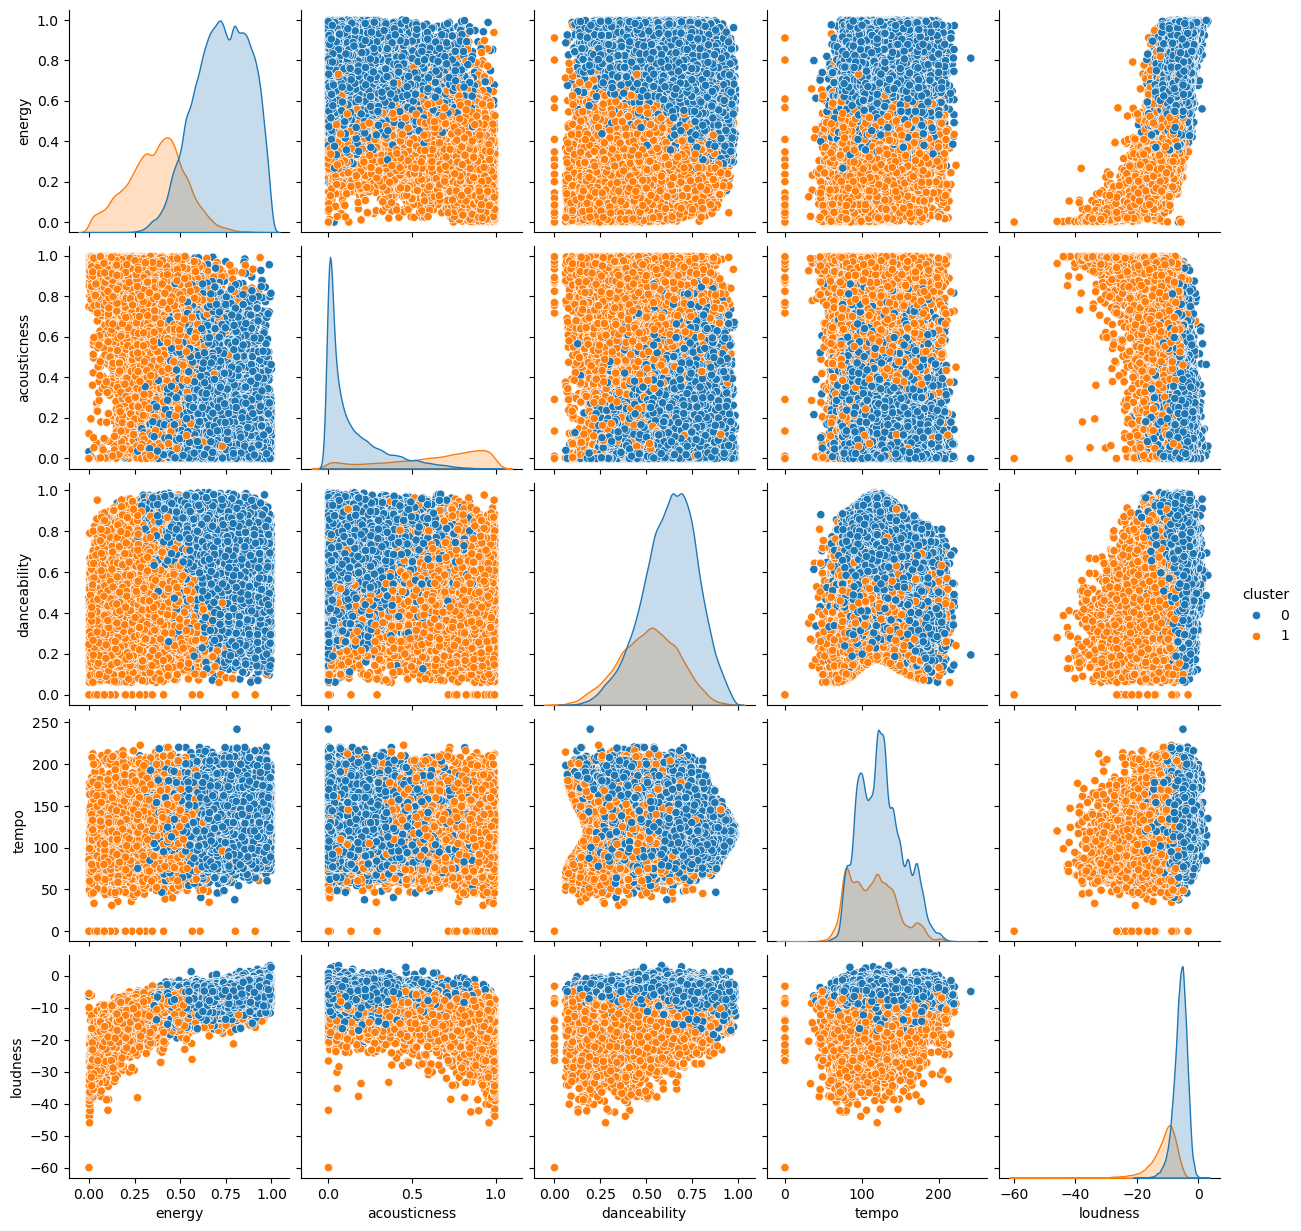

In [69]:
# visualizing the clusters
# using a pairplot to see how the clusters relate to each other
sns.pairplot(data, hue='cluster', vars=features_to_plot)
plt.show()

- A pairplot shows pairwise relationships between selected features (energy, danceability, loudness, ect) and colors the points by cluster.
- This allows you to see how different music features are distributed across clusters and whether there are obvious distinctions.

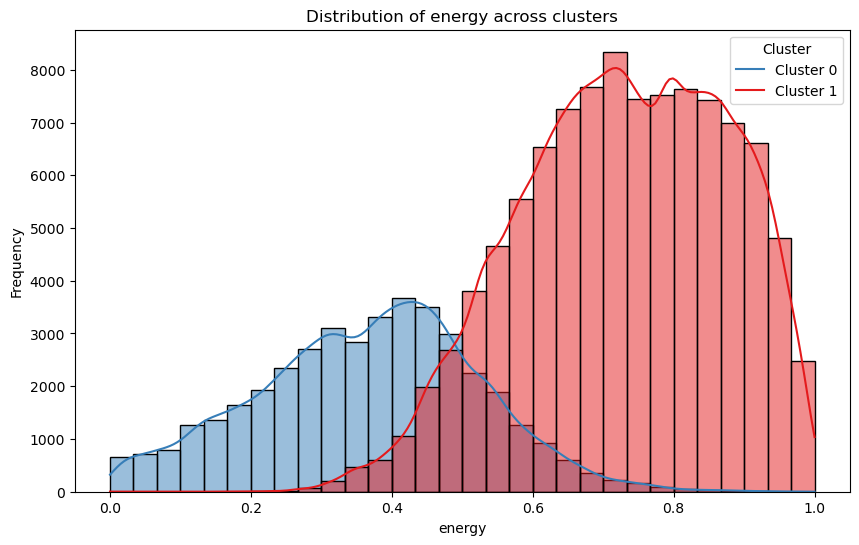

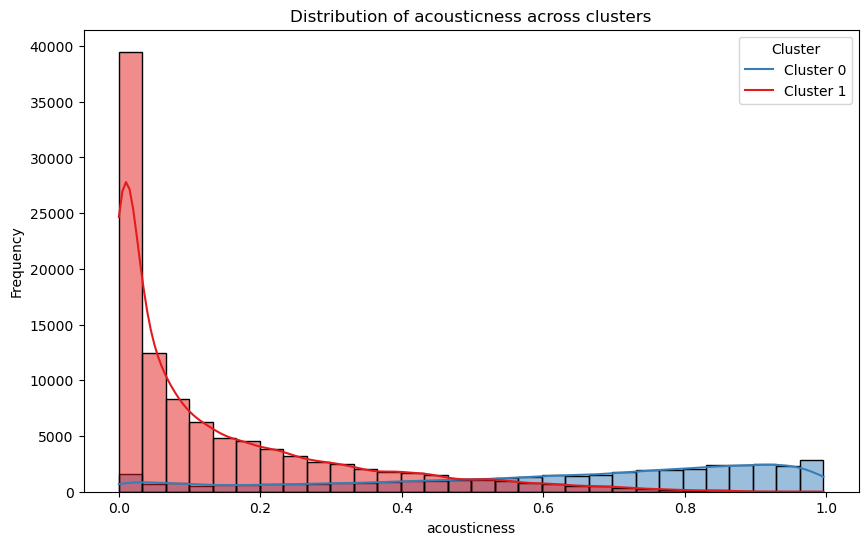

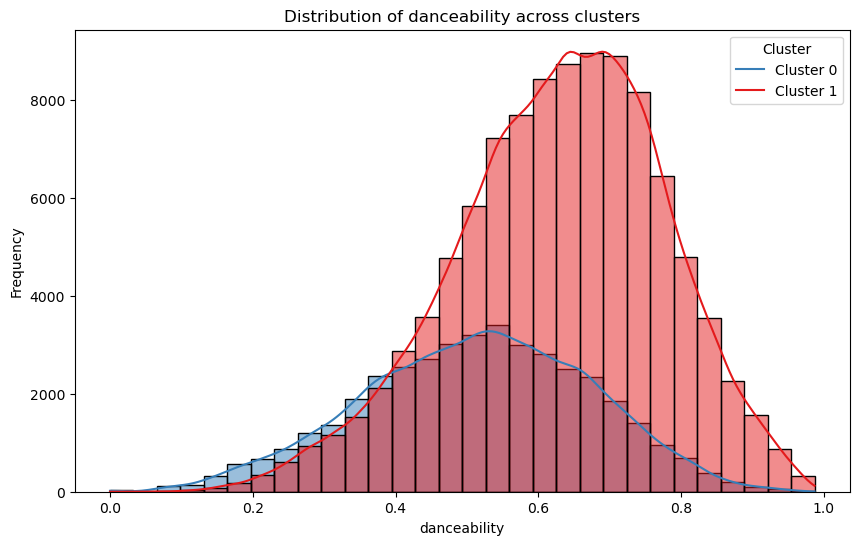

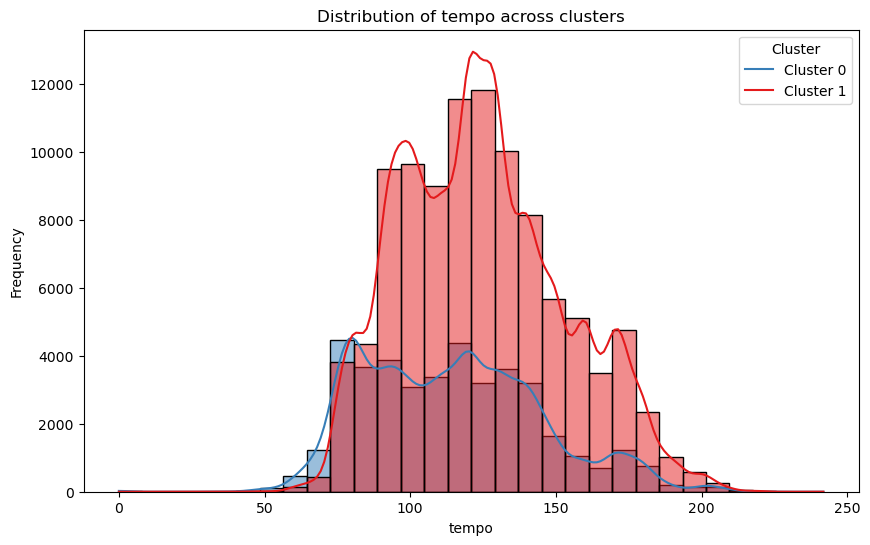

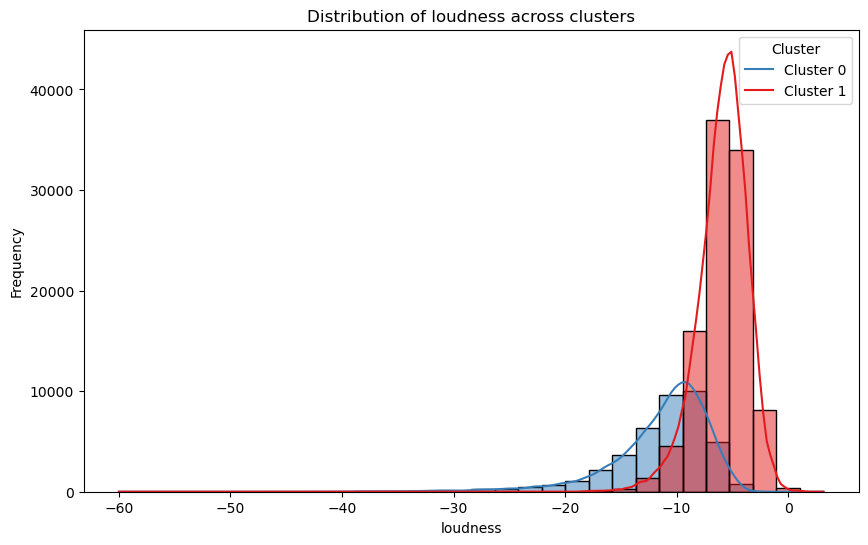

In [70]:
# histograms for each feature (comparing the distributions of each feature across the different clusters)
for feature in features_to_plot:
    plt.figure(figsize=(10, 6))
    # generating a histogram with 
    # kde: helps to visualize the distribution of data points in a more smoother and continuous form
    ax = sns.histplot(data=data, x=feature, hue='cluster', kde=True, bins=30, palette='Set1')
    plt.title(f'Distribution of {feature} across clusters')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    # using ax.get_legend() to get legend that is automatically generated
    ax.legend(title='Cluster', loc='upper right', labels=[f'Cluster {i}' for i in range(data['cluster'].nunique())])
    plt.show()

# overall, these plots help understand the distribution of music features across the clusters 
# and give insights to how personality traits might influence preferences for certain types of music.